In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
import torch
import pickle

from src.models.vision import get_encoder

/data/scratch/ankile/miniconda3/envs/rlgpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def print_stats(data):
    print(
        f"min: {np.min(data)}, max: {np.max(data)}, mean: {np.mean(data)}, std: {np.std(data)}"
    )


def make_hist(data, title=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title)

    ax1.hist(data, bins=100)
    ax1.set_title("Linear scale")

    ax2.hist(data, bins=100, log=True)
    ax2.set_title("Log scale")

## Investigate VIP

In [3]:
vip = zarr.open(
    "/data/scratch/ankile/furniture-data/data/processed/sim/feature/vip/one_leg/data.zarr"
)["observations"][10_000:, 14:]

In [ ]:
vip.shape

(275395, 2048)

In [5]:
vip_flat = vip.reshape(-1)

In [30]:
## Get the min and max for each feature and save for later
feature1 = vip[:, :1024]
feature2 = vip[:, 1024:]

stats = {
    "feature1": {
        "min": np.min(feature1, axis=0),
        "max": np.max(feature1, axis=0),
    },
    "feature2": {
        "min": np.min(feature2, axis=0),
        "max": np.max(feature2, axis=0),
    },
}

with open("/data/scratch/ankile/furniture-diffusion/src/data/vip_stats.pkl", "wb") as f:
    pickle.dump(stats, f)

min: -29.05980110168457, max: 39.561981201171875, mean: 0.01705080084502697, std: 1.5909817218780518


(array([9.00000000e+00, 2.90000000e+01, 3.20000000e+01, 4.40000000e+01,
        4.90000000e+01, 1.65000000e+02, 1.53500000e+03, 1.22420000e+04,
        4.06740000e+04, 7.39510000e+04, 1.98605000e+05, 1.35340000e+05,
        6.29890000e+04, 7.09720000e+04, 8.22270000e+04, 6.75440000e+04,
        4.68190000e+04, 2.79370000e+04, 1.75080000e+04, 1.38460000e+04,
        1.49800000e+04, 1.82530000e+04, 2.49670000e+04, 3.47090000e+04,
        4.84710000e+04, 6.25690000e+04, 8.13320000e+04, 9.74360000e+04,
        1.20555000e+05, 1.41841000e+05, 1.74569000e+05, 2.26299000e+05,
        3.08262000e+05, 4.51606000e+05, 6.70356000e+05, 9.36334000e+05,
        1.22996500e+06, 1.76305400e+06, 2.77577300e+06, 4.58683100e+06,
        8.18897000e+06, 1.45609440e+07, 4.92399863e+08, 1.25989990e+07,
        6.92069000e+06, 4.07451700e+06, 2.60137000e+06, 1.90534200e+06,
        1.45731000e+06, 1.05484800e+06, 7.82396000e+05, 5.51282000e+05,
        3.76780000e+05, 2.77429000e+05, 2.16222000e+05, 1.719210

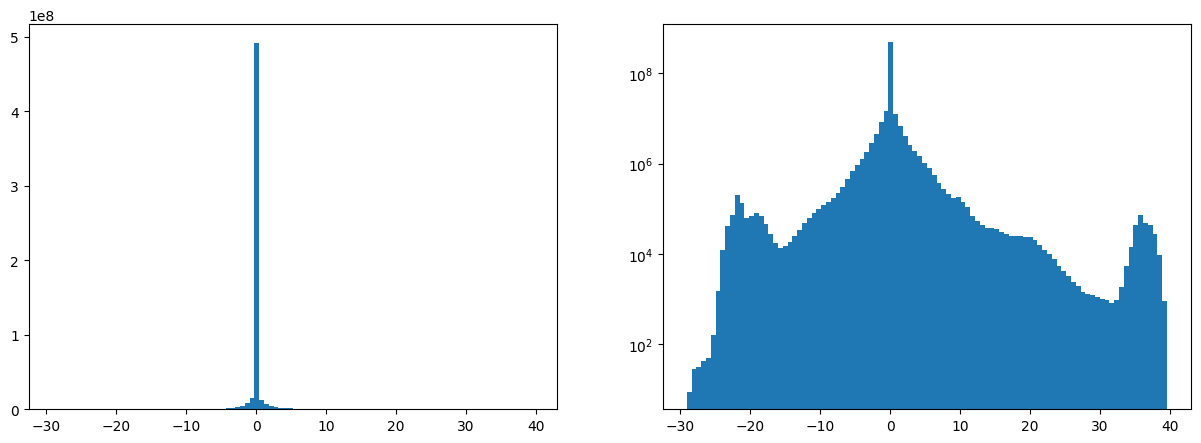

In [ ]:
print_stats(vip_flat)
make_hist(vip_flat)

## Investigate R3M

### R3M 50

In [22]:
r3m50 = zarr.open(
    "/data/scratch/ankile/furniture-data/data/processed/sim/feature/r3m-50/one_leg/data.zarr"
)["observations"][:10_000, 14:]

r3m50_flat = r3m50.reshape(-1)
r3m50.shape

(10000, 4096)

min: 0.0, max: 2908.44189453125, mean: 2.531458739697648, std: 34.34539680908851


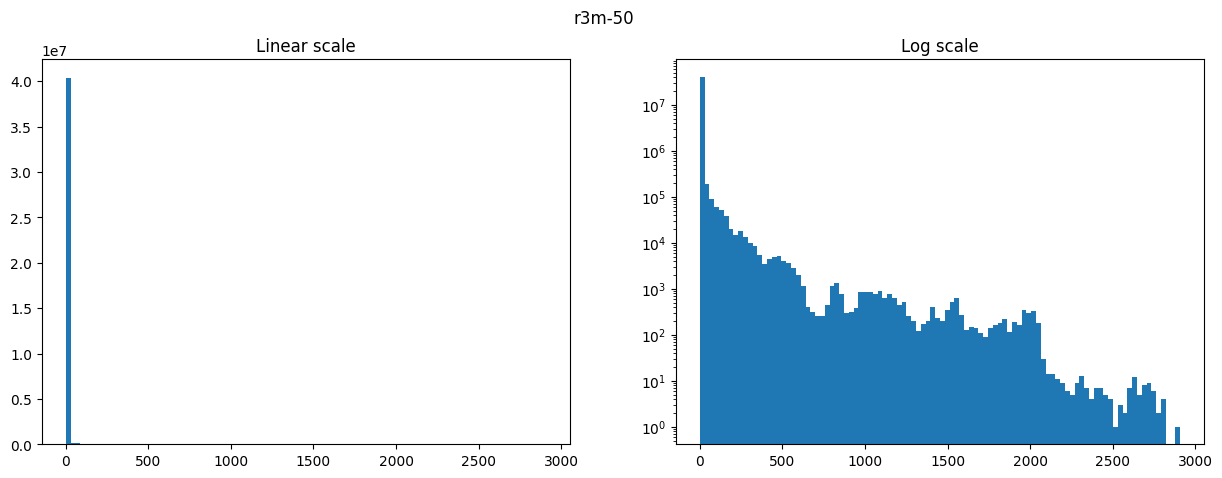

In [23]:
print_stats(r3m50_flat)
make_hist(r3m50_flat, "r3m-50")

### R3M 18

In [10]:
enc = get_encoder("r3m_34", device="cuda:1")

/data/scratch/ankile/miniconda3/envs/rlgpu/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/data/scratch/ankile/miniconda3/envs/rlgpu/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/scratch/ankile/miniconda3/envs/rlgpu/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [11]:
# Create 10_000 images randomly between [0, 255]
r3m18 = np.concatenate(
    [
        enc(
            torch.randint(
                0, 255, (1_000, 224, 224, 3), dtype=torch.uint8, device="cuda:1"
            )
        )
        .detach()
        .cpu()
        .numpy()
        for _ in range(10)
    ]
)

r3m18_flat = r3m18.reshape(-1)
r3m18.shape

(10000, 512)

min: 0.0, max: 4.003487586975098, mean: 0.07086589187383652, std: 0.2742479145526886


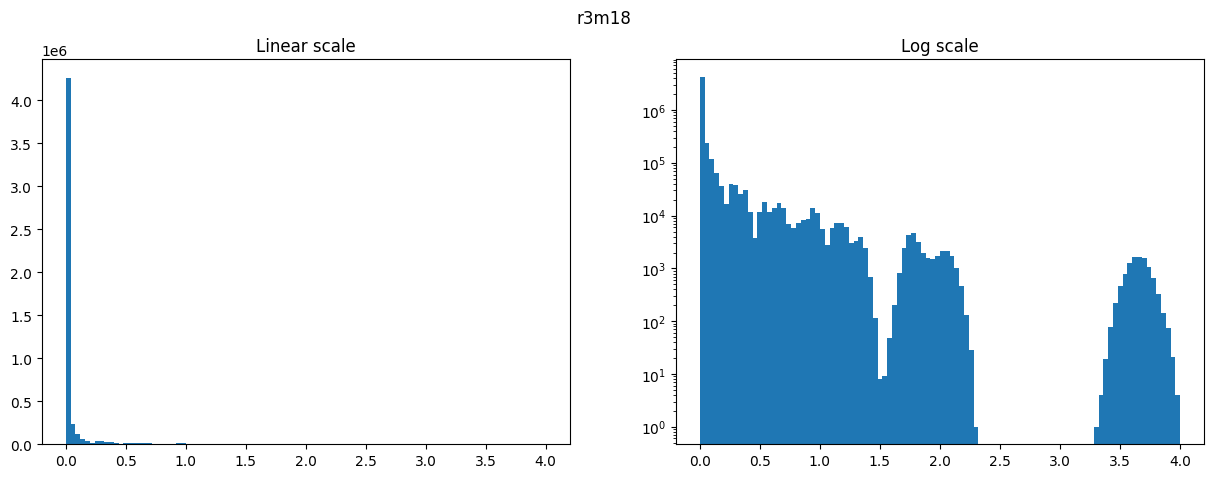

In [12]:
print_stats(r3m18_flat)
make_hist(r3m18_flat, title="r3m18")

## Investigate DINO

### Small

In [3]:
dino_small = zarr.open(
    "/data/scratch/ankile/furniture-data/data/processed/sim/feature/dinov2-small/one_leg/data.zarr"
)["observations"][:1_000, 14:]

In [4]:
dino_small.shape

(1000, 768)

min: -9.816547393798828, max: 9.743276596069336, mean: -0.004983902599563609, std: 1.661579145850393


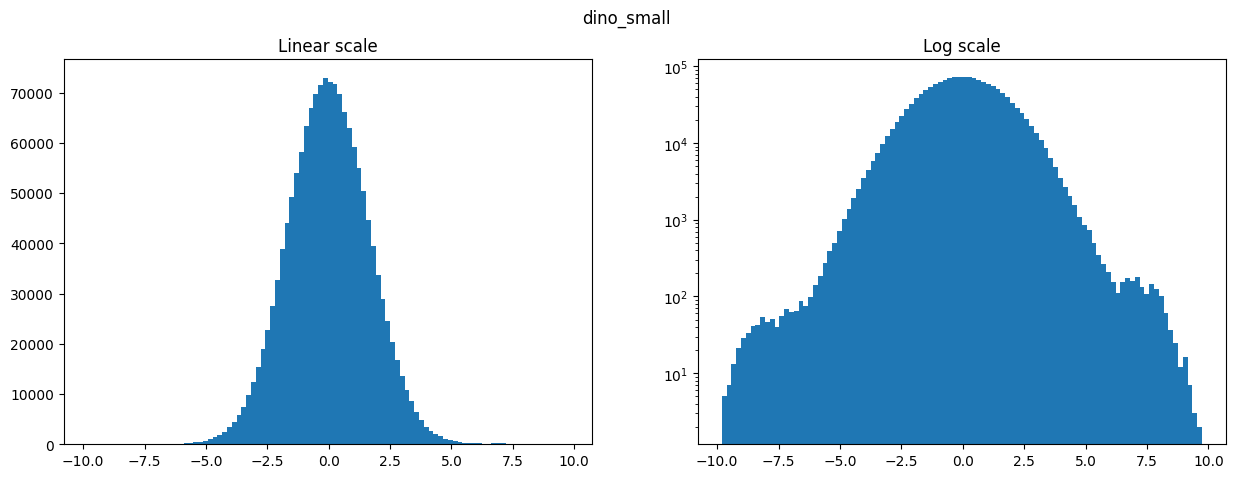

In [19]:
print_stats(dino_small.reshape(-1))
make_hist(dino_small.reshape(-1), title="dino_small")

### Base

In [8]:
dino_base = zarr.open(
    "/data/scratch/ankile/furniture-data/data/processed/sim/feature/dinov2-base/one_leg/data.zarr"
)["observations"][:1_000, 14:]

In [9]:
dino_base.shape

(1000, 1536)

min: -9.816547393798828, max: 9.743276596069336, mean: -0.004983902599563609, std: 1.661579145850393


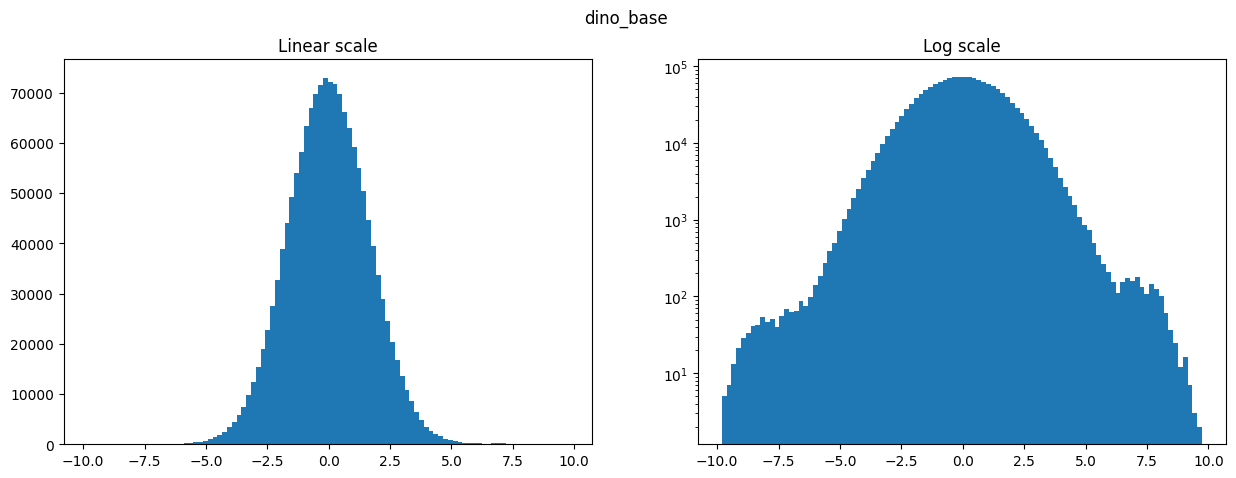

In [20]:
print_stats(dino_base.reshape(-1))
make_hist(dino_base.reshape(-1), title="dino_base")

### Large

In [12]:
dino_large = zarr.open(
    "/data/scratch/ankile/furniture-data/data/processed/sim/feature/dinov2-large/one_leg/data.zarr"
)["observations"][:1_000, 14:]

In [13]:
dino_large.shape

(1000, 2048)

min: -7.866496562957764, max: 7.395058631896973, mean: 0.0075769298619132695, std: 1.4145341163643903


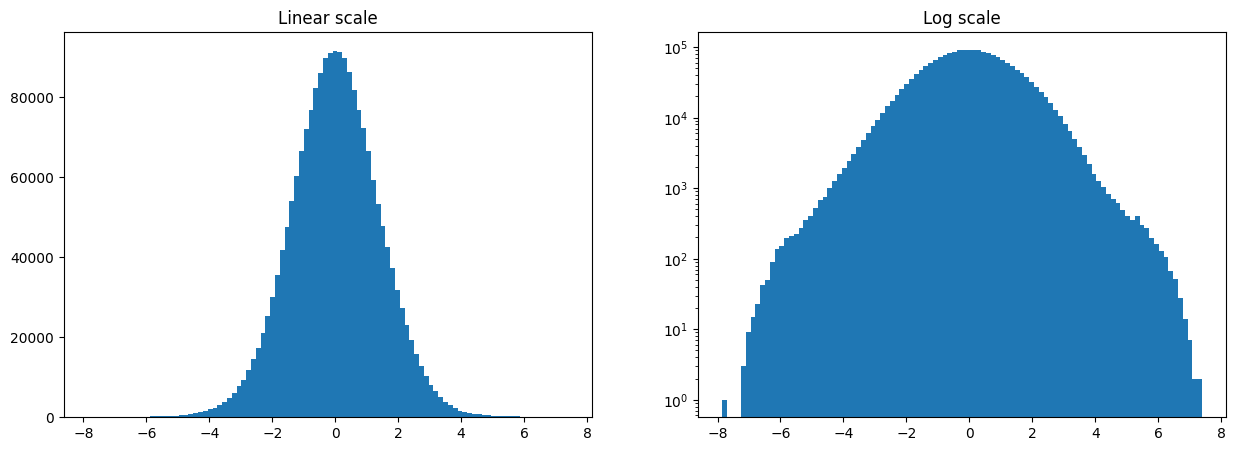

In [14]:
print_stats(dino_large.reshape(-1))
make_hist(dino_large.reshape(-1), title="dino_large")